In [2]:
import pandas as pd 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from model_evaluation import evaluate

In [4]:
features = pd.read_csv('extracted_features/time_domain_features.csv')

evaluate(features, LDA())

Accuracy Table for fault 7
   Training Load  Testing Load  Accuracy
0              0             0       1.0
1              0             1       1.0
2              1             0       1.0
3              1             1       1.0
Accuracy Table for fault 14
   Training Load  Testing Load  Accuracy
0              0             0  0.909091
1              0             1  1.000000
2              1             0  0.962963
3              1             1  1.000000
Accuracy Table for fault 21
   Training Load  Testing Load  Accuracy
0              0             0       1.0
1              0             1       1.0
2              1             0       1.0
3              1             1       1.0


In [5]:
features

,mean_value,std_dev,skewness,kurt,mean_value_2,std_dev_2,skewness_2,kurt_2,hp,target,defect_type
0,0.015263,0.137421,-0.024808,-0.035494,1093.513293,1.829880e+07,0.002144,-0.032456,0,ball,0.007
1,0.014904,0.136268,-0.020413,-0.060084,-1908.775210,1.809884e+07,0.002435,-0.069780,0,ball,0.007
2,0.013967,0.139614,0.011749,-0.026775,-3242.042754,1.862685e+07,-0.001741,-0.052458,0,ball,0.007
3,0.013387,0.138076,-0.014389,-0.121303,-1188.050539,1.842648e+07,0.000232,-0.129106,0,ball,0.007
4,0.012345,0.137713,-0.027351,0.024199,1762.096287,1.838006e+07,0.000348,0.032478,0,ball,0.007
...,...,...,...,...,...,...,...,...,...,...,...
255,0.011389,0.065953,-0.190523,-0.066923,58.203692,3.236234e+06,0.284885,-0.710529,1,normal,0.000
256,0.011076,0.062881,-0.197951,-0.152245,622.716923,3.186227e+06,0.284621,-0.723536,1,normal,0.000
257,0.011927,0.065367,-0.157801,-0.088412,53.196923,3.192689e+06,0.290668,-0.706373,1,normal,0.000
258,0.014620,0.064828,-0.226525,-0.003109,7.510154,3.211671e+06,0.304790,-0.667476,1,normal,0.000


In [6]:
import matplotlib.pyplot as plt

fault7 = features[features['defect_type'] == 0.007]

Text(0.5, 1.0, 'Skewness')

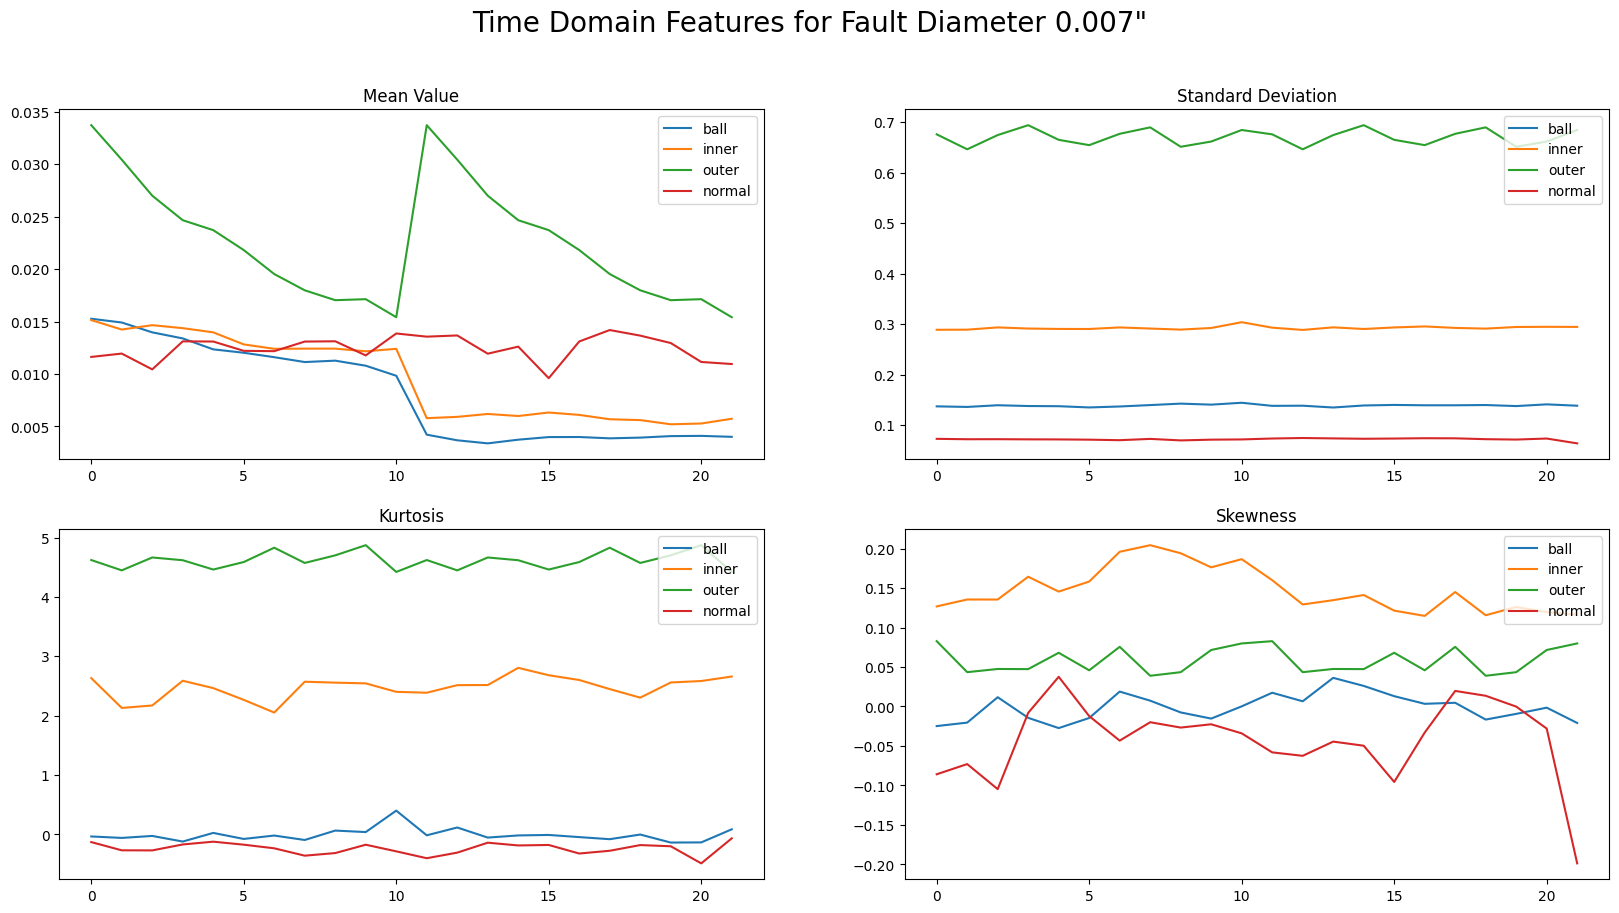

In [22]:
fault7ball = fault7[fault7['target'] == 'ball']
fault7inner = fault7[fault7['target'] == 'inner']
fault7outer = fault7[fault7['target'] == 'outer']
faultnormal = features[features['target'] == 'normal']

# add 4 plots to one figure
plt.figure(figsize=(20,10))
# Main title
plt.suptitle('Time Domain Features for Fault Diameter 0.007"', fontsize=20)

# Mean values
plt.subplot(2,2,1)
plt.plot(range(len(fault7ball)),fault7ball['mean_value'], label = 'ball')
plt.plot(range(len(fault7inner)),fault7inner['mean_value'], label = 'inner')
plt.plot(range(len(fault7outer)),fault7outer['mean_value'], label = 'outer')
plt.plot(range(len(fault7outer)),faultnormal['mean_value'][:len(fault7outer)], label = 'normal')
plt.legend(loc='upper right')
plt.title('Mean Value')
# plt.xlabel('Samples')
# plt.ylabel('Mean Value')

# Standard deviation
plt.subplot(2,2,2)
plt.plot(range(len(fault7ball)),fault7ball['std_dev'], label = 'ball')
plt.plot(range(len(fault7inner)),fault7inner['std_dev'], label = 'inner')
plt.plot(range(len(fault7outer)),fault7outer['std_dev'], label = 'outer')
plt.plot(range(len(fault7outer)),faultnormal['std_dev'][:len(fault7outer)], label = 'normal')
plt.legend(loc='upper right')
plt.title('Standard Deviation')
# plt.xlabel('Samples')
# plt.ylabel('Standard Deviation')

# Kurtosis
plt.subplot(2,2,3)
plt.plot(range(len(fault7ball)),fault7ball['kurt'], label = 'ball')
plt.plot(range(len(fault7inner)),fault7inner['kurt'], label = 'inner')
plt.plot(range(len(fault7outer)),fault7outer['kurt'], label = 'outer')
plt.plot(range(len(fault7outer)),faultnormal['kurt'][:len(fault7outer)], label = 'normal')
plt.legend(loc='upper right')
plt.title('Kurtosis')
# plt.xlabel('Samples')
# plt.ylabel('Kurtosis')  

# Skewness
plt.subplot(2,2,4)
plt.plot(range(len(fault7ball)),fault7ball['skewness'], label = 'ball')
plt.plot(range(len(fault7inner)),fault7inner['skewness'], label = 'inner')
plt.plot(range(len(fault7outer)),fault7outer['skewness'], label = 'outer')
plt.plot(range(len(fault7outer)),faultnormal['skewness'][:len(fault7outer)], label = 'normal')
plt.legend(loc='upper right')
plt.title('Skewness')
# plt.xlabel('Samples')
# plt.ylabel('Skewness')